# Explore here

In [35]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.to_csv("../data/raw/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

La data tiene 1338 filas y 7 columnas

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Hay 3 variables categoricas

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay valores nulos

In [7]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
data["sex"] = data["sex"].map({'male': 0, 'female': 1})
data["smoker"] = data["smoker"].map({'no': 0, 'yes': 1})
data["region"] = data["region"].map({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [11]:
data["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

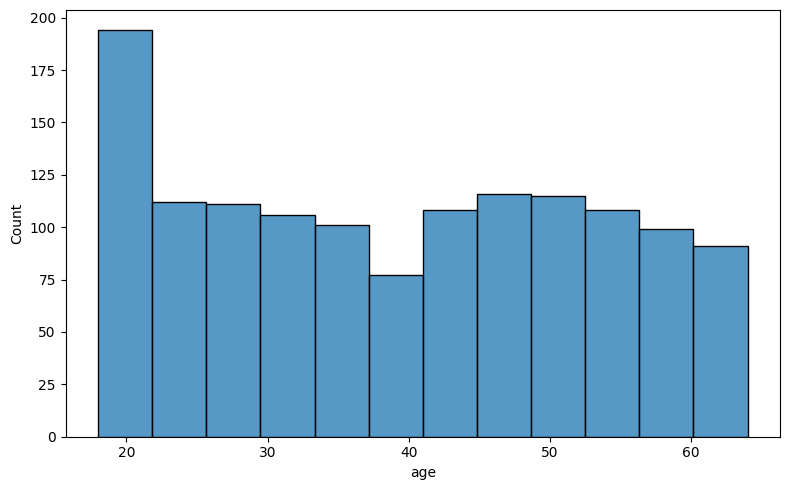

In [21]:

plt.figure(figsize=(8, 5))
sns.histplot(data = data, x = "age")
plt.tight_layout()
plt.show()

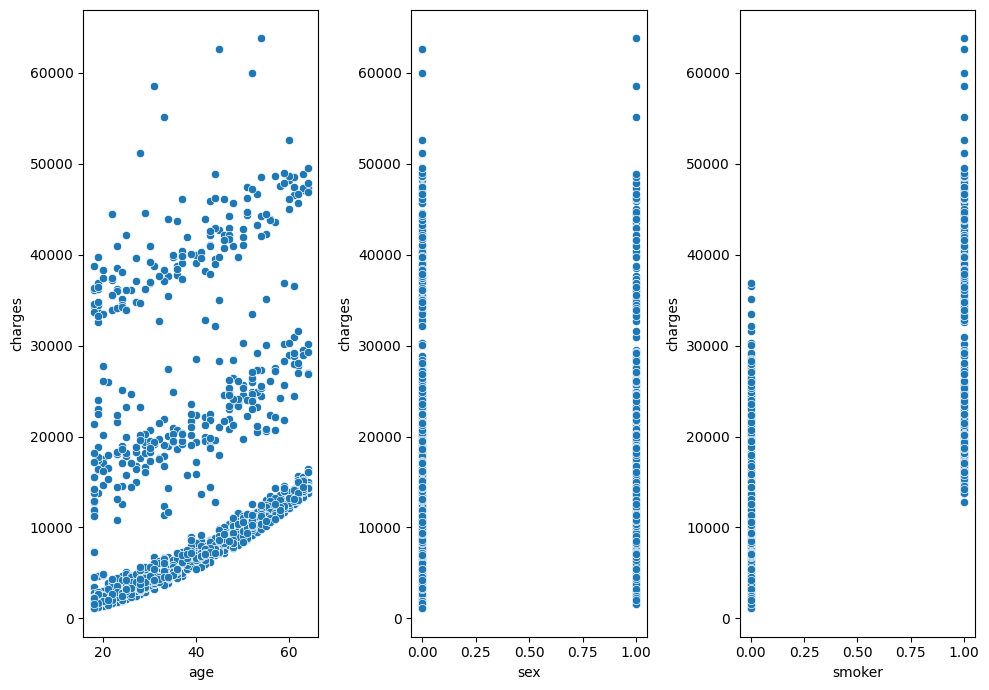

In [25]:
fig, axis = plt.subplots(1, 3, figsize=(10, 7))

# Create Histogram
sns.scatterplot(ax = axis[0], data = data, x = "age", y = "charges")
sns.scatterplot(ax = axis[1], data = data, x = "sex", y = "charges")
sns.scatterplot(ax = axis[2], data = data, x = "smoker", y = "charges")

plt.tight_layout()
plt.show()

<Axes: >

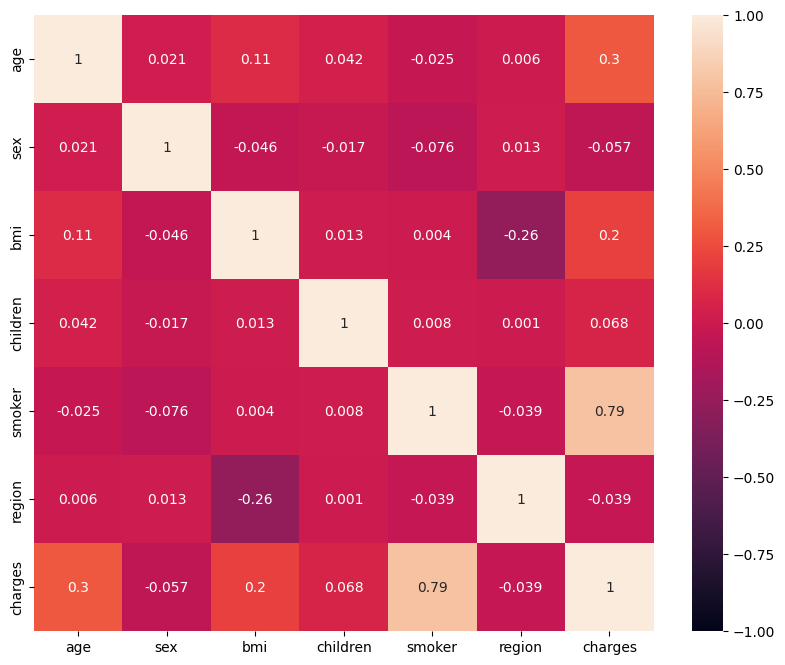

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(3), vmax=1, vmin=-1, annot=True)

Pareciera que el bmi esta relacionada con la region, por tanto voy a tomar solo una de las columnas
El ser fumador es lo que mas influye en el costo de la prima

In [30]:
X = data[["age","sex","children","smoker","region"]]
Y = data["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [32]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [33]:
print(f"Intercepto (a): {modelo.intercept_}")
print(f"Coeficientes (b): {modelo.coef_}")

Intercepto (a): -2752.6250236064807
Coeficientes (b): [  264.59677134   349.85908517   584.56040256 24040.67014056
   -24.52777091]


In [34]:
predicciones = modelo.predict(X_test)

In [36]:
print(f"Error cuadrático medio: {mean_squared_error(Y_test, predicciones)}")
print(f"Coeficiente de determinación: {r2_score(Y_test, predicciones)}")

Error cuadrático medio: 44024383.22100278
Coeficiente de determinación: 0.7063252610953502


El R2 solo dio un 70%. Puede que el modelo no se este ajustando a los datos